In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# the neccessary imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Student_Performance.csv')

In [4]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
data.shape

(10000, 6)

In [6]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
# calculating how many duplicates are present

data.duplicated().sum()

127

In [9]:
# dropping the duplicate data and updating our dataset

updated_data = data.drop_duplicates()

In [12]:
# checking if any duplicates are left

updated_data.duplicated().sum()

0

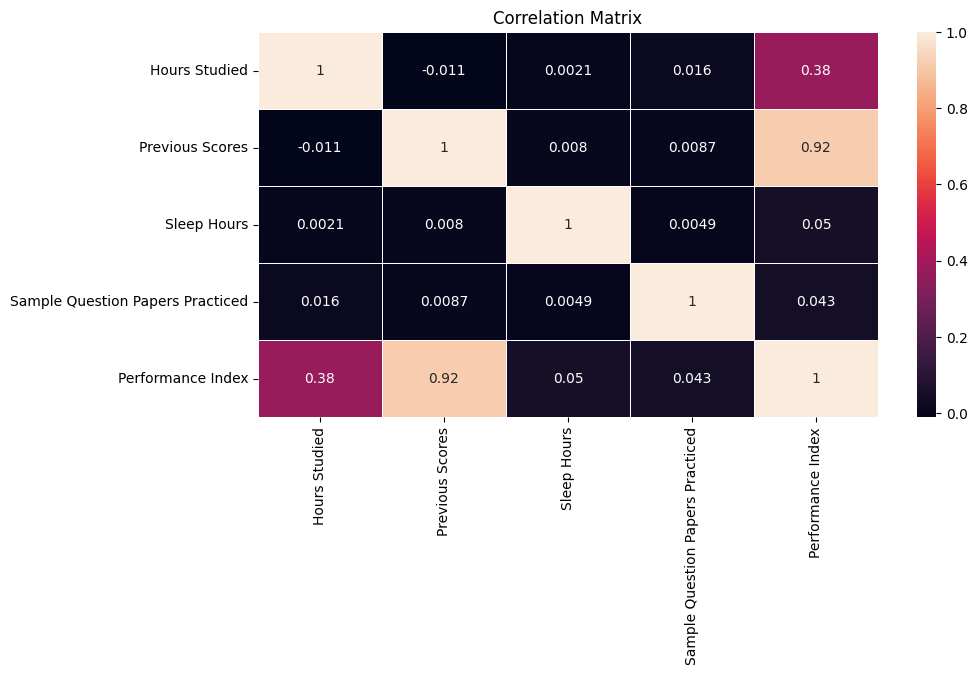

In [13]:
correlation_matrix = updated_data.corr(numeric_only=True)
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
le = LabelEncoder()
updated_data.iloc[ :,2] = le.fit_transform(updated_data.iloc[ :, 2])

In [15]:
updated_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [16]:
X = updated_data.drop('Performance Index',axis = 1).values
Y = updated_data['Performance Index'].values

In [17]:
X

array([[7, 99, 1, 9, 1],
       [4, 82, 0, 4, 2],
       [8, 51, 1, 7, 2],
       ...,
       [6, 83, 1, 8, 5],
       [9, 97, 1, 7, 0],
       [7, 74, 0, 8, 1]], dtype=object)

In [18]:
Y

array([91., 65., 45., ..., 74., 95., 64.])

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=0)

In [20]:
# Standard scaling of the data to remove the biasness and prevent inaccuracy

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [22]:
# Building the deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

In [23]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

In [25]:
# Predict on test set
y_pred = model.predict(X_test_scaled)
y_pred

78/78 [==============================] - 0s 2ms/step


array([[73.10992 ],
       [28.933071],
       [38.989326],
       ...,
       [79.80787 ],
       [37.218594],
       [63.736416]], dtype=float32)

In [26]:
y_test

array([74., 30., 40., ..., 76., 37., 61.])

In [27]:
r2Score = r2_score(y_test,y_pred)
print("R2_Score:", r2Score)

R2_Score: 0.9871847194396867


In [28]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4.716500164362583
